### 02_projecte_datasceince_sql

In [33]:
#Basicques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
import re
import datetime

#SQL
import mysql.connector
from sqlalchemy import create_engine

#Labelencorder
from sklearn.preprocessing import LabelEncoder

#warnings
import warnings
warnings.filterwarnings('ignore')
#Options
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)
pd.set_option('display.expand_frame_repr', False)

# Grafic de pronostic
import scipy.stats as stats

In [34]:
D="C:\\Users\\Anton SL\\OneDrive\\Documentos\\IT_Academics\\Data_Science\\DataScienceProject\\datasets_definitius\\"

### <span style=color:darkred>Scripts MySQL </span>

In [35]:
mydb = mysql.connector.connect(
  host="127.0.0.1",
  user="root",
  password="Zxcvbn123+-",
  database='cryptopunks')

print(mydb)

In [36]:
mycursor = mydb.cursor()

### <span style=color:darkred>Generem dos Dataframe per analitzar les característiques físiques </span>


#### Generem un datafram  amb tots els Cryptopunks i els atributs

In [37]:
Q1 = 'select mp.idpunks, pt.type, pt.accesories2 '
Q2 = ' from master_punks2 as mp inner join punks_accesories2 pt on mp.id = pt.id'
Q3 = ' order by idpunks asc;'

In [38]:
df_all = pd.read_sql(Q1+Q2 +Q3, mydb)

In [39]:
df_all

,idpunks,type,accesories2
0,0,Male,Smile
1,0,Male,Mohawk
2,1,Male,Smile
3,1,Male,Mohawk
4,2,Female,Wild Hair
...,...,...,...
27541,9998,Female,Wild White Hair
27542,9998,Female,Black Lipstick
27543,9998,Female,Clown Eyes Green
27544,9999,Female,Mohawk


In [40]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27546 entries, 0 to 27545
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   idpunks      27546 non-null  int64 
 1   type         27546 non-null  object
 2   accesories2  27546 non-null  object
dtypes: int64(1), object(2)
memory usage: 645.7+ KB


In [41]:
#df_all.to_csv('df_all.csv')

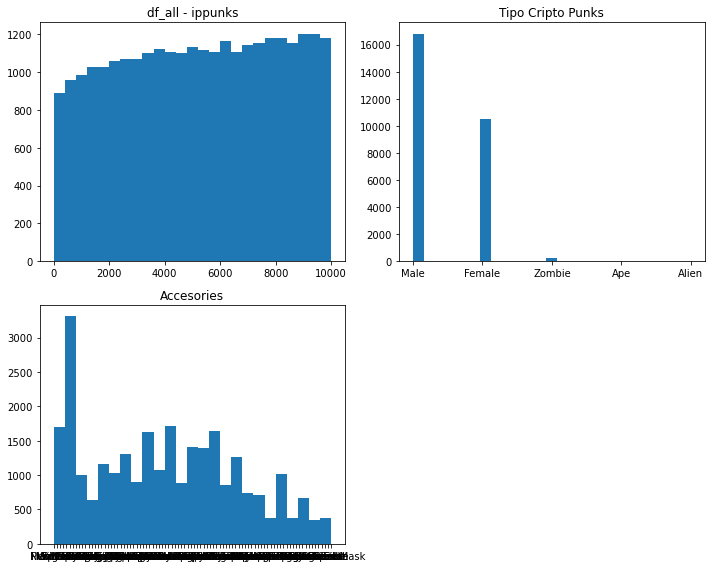

In [42]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(2, 2, 1)

ax1.hist(df_all['idpunks'], bins=25)
plt.title('df_all - ippunks')


ax2 = fig.add_subplot(2, 2, 2)

ax2.hist(df_all['type'], bins=25)
plt.title('Tipo Cripto Punks')


ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(df_all['accesories2'], bins=25)
plt.title('Accesories')

plt.tight_layout()

#### Dataframe  dels atributs dels 1000 mes venuts

Q1 = 'select pa.id,pa.Type,pa.accesories2 '
Q2 = 'from historico_trans ht inner join punks_accesories2 pa on ht.cryptopunk_number = pa.id '
Q3 = 'where ht.trs_type="Sold" order by amount_dolars desc LIMIT 1000;'

In [43]:
q1 = 'select pa.id,pa.Type,pa.accesories2'
q2 = ' from historico_trans ht inner join punks_accesories2 pa on ht.cryptopunk_number = pa.id'
q3 = ' inner join top1000 tp on ht.cryptopunk_number = tp.id2'
q4 = ' where ht.trs_type="Sold" order by amount_dolars desc'

In [44]:
#df_ts = pd.read_sql(Q1+Q2+Q3 , mydb)
df_ts = pd.read_sql(q1+q2+q3+q4 , mydb)

In [45]:
df_ts

,id,Type,accesories2
0,3100,Alien,Headband
1,1190,Zombie,Cigarette
2,1190,Zombie,Bandana
3,1190,Zombie,Handlebars
4,1190,Zombie,Earring
...,...,...,...
4463,8302,Male,Earring
4464,9245,Male,Fedora
4465,9245,Male,Mustache
4466,9245,Male,Earring


In [46]:
#df_ts.to_csv('df_ts.csv')

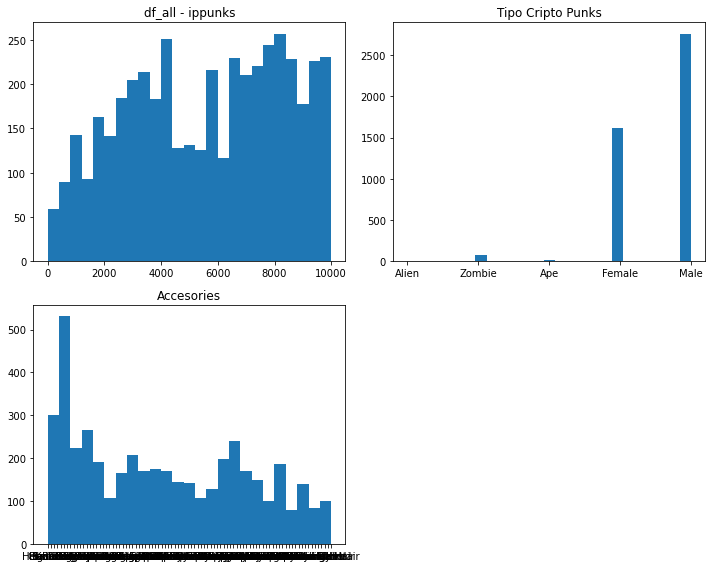

In [47]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(2, 2, 1)

ax1.hist(df_ts['id'], bins=25)
plt.title('df_all - ippunks')


ax2 = fig.add_subplot(2, 2, 2)

ax2.hist(df_ts['Type'], bins=25)
plt.title('Tipo Cripto Punks')


ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(df_ts['accesories2'], bins=25)
plt.title('Accesories')

plt.tight_layout()

### <span style=color:darkred>-Gràfiques DataFrame creats Accesorie</span>


#### comparació dels 10 atributa més repetitis en dues Tbl.

In [48]:
df_all['accesories2'].value_counts(normalize=True).head(10)*100

Earring               8.923256
Cigarette             3.488710
Hot Lipstick          2.526683
Purple Lipstick       2.377841
Mole                  2.337908
Black Lipstick        2.239890
Nerd Glasses          2.076527
Big Shades            1.942206
Horned Rim Glasses    1.942206
Regular Shades        1.913163
Name: accesories2, dtype: float64

#### Gràfica amb els atributs de tots el Criptopunks

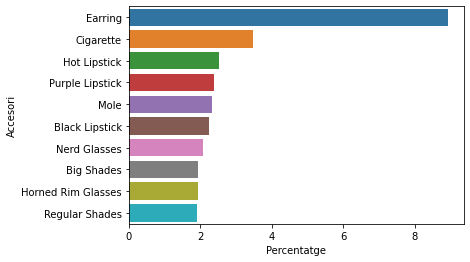

In [49]:
mydcit = dict(df_all['accesories2'].value_counts(normalize=True).head(10)*100)
df = pd.DataFrame([[key, mydcit[key]] for key in mydcit.keys()], columns=['Accesori', 'Percentatge'])
sns.barplot(x='Percentatge',y='Accesori', data= df, orient='h')
plt.savefig('.\diagrama\imagen1.png')

#### Gràfica amb els atributs de dels 1000 ms cars el Criptopunks

In [50]:
df_ts['accesories2'].value_counts(normalize=True).head(10)*100

Earring            9.534467
Cigarette          3.357207
Hot Lipstick       2.618621
Mole               2.439570
Big Shades         2.260519
Purple Lipstick    2.260519
Black Lipstick     1.991943
3D Glasses         1.969561
Shadow Beard       1.857654
Nerd Glasses       1.812892
Name: accesories2, dtype: float64

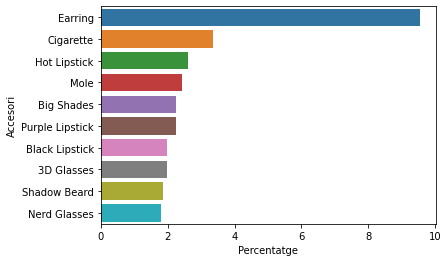

In [51]:
mydcit = dict(df_ts['accesories2'].value_counts(normalize=True).head(10)*100)
df = pd.DataFrame([[key, mydcit[key]] for key in mydcit.keys()], columns=['Accesori', 'Percentatge'])
sns.barplot(x='Percentatge',y='Accesori', data= df, orient='h')
plt.savefig('.\diagrama\imagen2.png')

### <span style=color:darkred>Análisis types </span>

#### entre tots els CryptoPunks


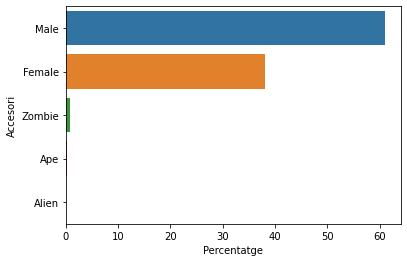

In [52]:
mydcit = dict(df_all['type'].value_counts(normalize=True).head(10)*100)
df = pd.DataFrame([[key, mydcit[key]] for key in mydcit.keys()], columns=['Accesori', 'Percentatge'])
sns.barplot(x='Percentatge',y='Accesori', data= df, orient='h')
plt.savefig('.\diagrama\imagen3.png')

#### Entre el mes venuts 1000 mes venuts

In [53]:
df_ts['Type'].value_counts(normalize=True).head(10)*100

Male      61.772605
Female    36.056401
Zombie     1.611459
Ape        0.402865
Alien      0.156670
Name: Type, dtype: float64

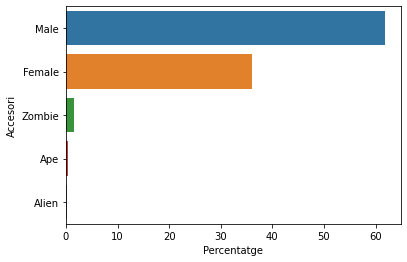

In [54]:
mydcit = dict(df_ts['Type'].value_counts(normalize=True).head(10)*100)
df = pd.DataFrame([[key, mydcit[key]] for key in mydcit.keys()], columns=['Accesori', 'Percentatge'])
sns.barplot(x='Percentatge',y='Accesori', data= df, orient='h')
plt.savefig('.\diagrama\imagen4.png')

#### Entre el mes venuts 100 mes venuts

In [55]:
Q1 = ' SELECT tp.id, pa.type, pa.accesories2 FROM topsales tp'
Q2 = ' inner join punks_accesories2 pa on tp.id = pa.id'

In [56]:
df_ts_100 = pd.read_sql(Q1+Q2 ,mydb)

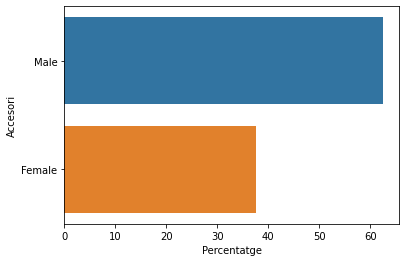

In [57]:
mydcit = dict(df_ts_100['type'].value_counts(normalize=True).head(10)*100)
df = pd.DataFrame([[key, mydcit[key]] for key in mydcit.keys()], columns=['Accesori', 'Percentatge'])
sns.barplot(x='Percentatge',y='Accesori', data= df, orient='h')
plt.savefig('.\diagrama\imagen6.png')

Hi ha una diferencia important entre els 100 types mes venuts i els types de tota la base de dades. Entre els mes venuts Zombie esta en segona posició a diferència de Female que estaria en segoan posició entre tots els Criptopunks.

### <span style=color:darkred>Análisis número de Accesories </span>

#### Entre tots els CryptoPunks

In [58]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27546 entries, 0 to 27545
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   idpunks      27546 non-null  int64 
 1   type         27546 non-null  object
 2   accesories2  27546 non-null  object
dtypes: int64(1), object(2)
memory usage: 645.7+ KB


In [59]:
Q1 = 'select  pa.id, pa.type, count( pa.count) as NumeroAccesorio '
Q2 = ' from punks_accesories2  pa group by pa.id, pa.Type; '

In [60]:
df_all = pd.read_sql(Q1 + Q2, mydb)
df_all

,id,type,NumeroAccesorio
0,0,Female,3
1,1,Male,2
2,2,Female,1
3,3,Male,3
4,4,Male,4
...,...,...,...
9995,9995,Female,2
9996,9996,Male,4
9997,9997,Zombie,2
9998,9998,Female,3


In [61]:
df_all['NumeroAccesorio'].value_counts(normalize=True).head(10)*100

3    45.01
2    35.60
4    14.20
1     3.41
5     1.66
6     0.11
7     0.01
Name: NumeroAccesorio, dtype: float64

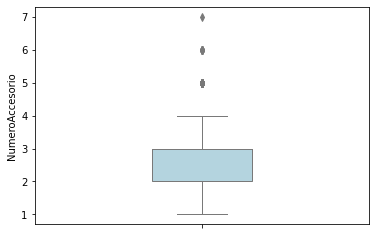

In [62]:
ax = sns.boxplot(y = df_all['NumeroAccesorio'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)
plt.savefig('.\diagrama\imagen5.png')

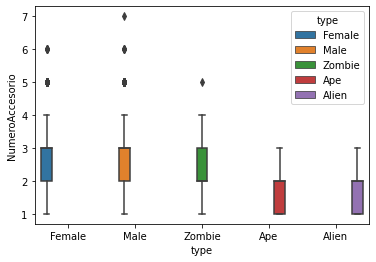

In [63]:
sns.boxplot(x='type', y= 'NumeroAccesorio', hue='type', 
               data=df_all[df_all.NumeroAccesorio > 0]);
plt.savefig('.\diagrama\imagen7.png')

#### Entre tots els mes venuts

In [65]:
Q1 = 'select  pa.id, pa.type, sum( pa.count) as NumeroAccesorio ' 
Q2 = ' from punks_accesories2  pa inner join topsales ts '
Q3 = ' on pa.id = ts.id group by pa.id, pa.type;'

In [66]:
df_ts = pd.read_sql(Q1+Q2+Q3, mydb)

In [67]:
df_ts['NumeroAccesorio'].value_counts(normalize=True).head(10)*100

2.0    38.983051
3.0    30.508475
1.0    25.423729
4.0     3.389831
5.0     1.694915
Name: NumeroAccesorio, dtype: float64

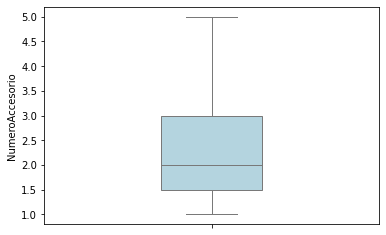

In [35]:
ax = sns.boxplot(y = df_ts['NumeroAccesorio'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)
plt.savefig('.\diagrama\imagen8.png')

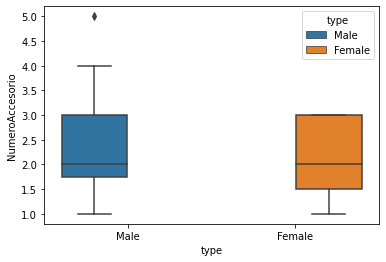

In [36]:
sns.boxplot(x='type', y= 'NumeroAccesorio', hue='type', 
               data=df_ts[df_ts.NumeroAccesorio > 0]);

plt.savefig('.\diagrama\imagen9.png')

### <span style=color:darkred>Análisis exploratori informació Rarity </span>

In [37]:
Q1 = 'select ht.transaccion_date,mp.id, ra.rarity, ht.trs_type, ht.amount_dolars,ht.amount_eth ' 
Q2 = ' from master_punks2 mp inner join rarity ra '
Q3 = ' on mp.id = ra.id  inner join historico_trans ht on mp.id = ht.cryptopunk_number '
Q4 = ' group by ht.transaccion_date,mp.id, ra.rarity, ht.trs_type, ht.amount_dolars,ht.amount_eth;'

In [38]:
df_rar = pd.read_sql(Q1+Q2+Q3, mydb)
df_rar

,transaccion_date,id,rarity,trs_type,amount_dolars,amount_eth
0,2020-11-30,1,0.094547,Transfer,0.00,0.000
1,2020-11-30,1,0.094547,Sold,36890.60,60.000
2,2020-11-30,1,0.094547,Bid,36890.60,60.000
3,2020-11-25,1,0.094547,Offered,45369.60,79.500
4,2020-11-23,1,0.094547,Bid withdrawn,30422.70,50.000
...,...,...,...,...,...,...
133778,2017-07-03,9999,0.058436,Bid,70.72,0.250
133779,2017-06-27,9999,0.058436,Bid,58.62,0.200
133780,2017-06-24,9999,0.058436,Bid,64.74,0.200
133781,2017-06-24,9999,0.058436,Bid,49.85,0.154


In [39]:
df_rar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133783 entries, 0 to 133782
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaccion_date  133783 non-null  object 
 1   id                133783 non-null  int64  
 2   rarity            133783 non-null  float64
 3   trs_type          133783 non-null  object 
 4   amount_dolars     133783 non-null  float64
 5   amount_eth        133783 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 6.1+ MB


In [40]:
df_rar.describe()

,id,rarity,amount_dolars,amount_eth
count,133783.000000,133783.000000,1.337830e+05,1.337830e+05
mean,5293.719785,0.094943,2.354671e+27,7.702324e+24
std,2768.368427,0.048427,8.612530e+29,2.817202e+27
min,1.000000,0.000200,0.000000e+00,0.000000e+00
25%,2976.000000,0.058457,0.000000e+00,0.000000e+00
50%,5331.000000,0.102444,2.489800e+02,1.000000e+00
75%,7668.000000,0.117059,3.834910e+04,2.000000e+01
max,9999.000000,0.681820,3.150150e+32,1.030430e+30


In [41]:
df_rar2= pd.DataFrame( df_rar[df_rar['trs_type']=='Sold'])

In [42]:
df_rar2.rarity.mean() , df_rar2.rarity.median()

(0.10213851144362737, 0.104054)

In [43]:
df_rar.rarity.mean(), df_rar.rarity.median()

(0.09494330171354078, 0.102444)

### <span style=color:darkred>Análisis rendimenty </span>

In [44]:
#all
Q1 = 'select ht.transaccion_date,mp.id, pa2.type,ra.rarity, ht.trs_type, ht.amount_dolars,ht.amount_eth, ht.adj_close '
Q2 = ' from master_punks2 mp inner join rarity ra on mp.id = ra.id'
Q3 = ' inner join historico_trans ht on mp.id = ht.cryptopunk_number inner join punks_accesories2 pa2 on mp.id = pa2.id '
Q4 = ' where ht.trs_type ="Sold"' 
Q5 = ' group by ht.transaccion_date,mp.id, ra.rarity, ht.trs_type, ht.amount_dolars,ht.amount_eth '
Q6 = ' order by mp.id, ht.transaccion_date desc ;'

In [45]:
df_finance = pd.DataFrame()

In [46]:
df_finance = pd.read_sql(Q1+Q2+Q3+Q4 +Q5, mydb)#all
#df_finance = pd.read_sql(q1+q2+q3+q4+q5+q6+q7, mydb) # top 1000

In [47]:
df_finance

,transaccion_date,id,type,rarity,trs_type,amount_dolars,amount_eth,adj_close
0,2020-11-30,1,Male,0.094547,Sold,36890.60,60.00,614.8430
1,2019-04-06,1,Male,0.094547,Sold,5144.36,31.00,165.9470
2,2017-06-26,1,Male,0.094547,Sold,114.53,0.42,272.6920
3,2018-12-07,14,Female,0.021557,Sold,233.24,2.50,93.2946
4,2017-07-17,14,Female,0.021557,Sold,357.83,1.85,193.4240
...,...,...,...,...,...,...,...,...
12475,2017-11-28,9989,Female,0.021576,Sold,141.87,0.30,472.9020
12476,2021-03-20,9990,Male,0.173996,Sold,44409.60,24.50,1812.6300
12477,2021-02-08,9997,Zombie,0.008606,Sold,174644.00,99.99,1746.6200
12478,2021-03-03,9998,Female,0.054166,Sold,59882.40,38.00,1575.8500


In [48]:
df_finance.describe()

,id,rarity,amount_dolars,amount_eth,adj_close
count,12480.000000,12480.000000,1.248000e+04,12480.000000,12480.000000
mean,5375.764343,0.102114,2.922758e+04,14.786095,1199.910606
std,2661.920676,0.045818,1.121915e+05,59.221373,974.498989
min,1.000000,0.000200,0.000000e+00,0.000000,0.000000
25%,3126.000000,0.060217,1.304500e+02,0.600000,273.303000
50%,5354.000000,0.104054,6.378025e+03,6.500000,1225.680000
75%,7658.000000,0.119896,4.258320e+04,21.950000,1854.560000
max,9998.000000,0.681778,7.670020e+06,4200.000000,4168.700000


In [49]:
df_finance['transaccion_date'] = pd.to_datetime(df_finance['transaccion_date'])

In [50]:
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12480 entries, 0 to 12479
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaccion_date  12480 non-null  datetime64[ns]
 1   id                12480 non-null  int64         
 2   type              12480 non-null  object        
 3   rarity            12480 non-null  float64       
 4   trs_type          12480 non-null  object        
 5   amount_dolars     12480 non-null  float64       
 6   amount_eth        12480 non-null  float64       
 7   adj_close         12480 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 780.1+ KB


In [51]:
df_finance.isnull().sum()

transaccion_date    0
id                  0
type                0
rarity              0
trs_type            0
amount_dolars       0
amount_eth          0
adj_close           0
dtype: int64

#### Càlcul numero de venda i rendiment

In [52]:
mylista = list(df_finance.id.unique()) # all
#mylista = list(df_finance.id2.unique()) #1000
mylista

[1,
 14,
 33,
 53,
 89,
 116,
 118,
 124,
 138,
 139,
 141,
 143,
 155,
 160,
 161,
 168,
 169,
 173,
 195,
 203,
 240,
 241,
 249,
 257,
 259,
 260,
 264,
 273,
 280,
 281,
 283,
 285,
 287,
 291,
 294,
 299,
 318,
 322,
 328,
 329,
 332,
 335,
 338,
 339,
 340,
 341,
 342,
 344,
 346,
 352,
 353,
 355,
 365,
 368,
 376,
 381,
 382,
 383,
 384,
 385,
 402,
 404,
 406,
 407,
 410,
 411,
 416,
 422,
 426,
 430,
 431,
 435,
 441,
 445,
 446,
 447,
 449,
 453,
 457,
 460,
 465,
 470,
 471,
 473,
 483,
 485,
 486,
 488,
 490,
 494,
 497,
 501,
 504,
 505,
 506,
 507,
 509,
 510,
 512,
 516,
 518,
 522,
 526,
 534,
 535,
 538,
 544,
 547,
 548,
 549,
 550,
 553,
 561,
 563,
 564,
 568,
 573,
 577,
 578,
 586,
 588,
 589,
 591,
 593,
 599,
 604,
 605,
 608,
 610,
 613,
 615,
 616,
 617,
 618,
 620,
 622,
 627,
 628,
 638,
 639,
 641,
 642,
 648,
 660,
 661,
 665,
 668,
 669,
 675,
 678,
 680,
 682,
 685,
 686,
 688,
 698,
 702,
 703,
 706,
 709,
 717,
 719,
 721,
 729,
 730,
 735,
 741,
 742

In [53]:
df_1 = pd.DataFrame()
MyListaAnidada = []
i = 0

for elem in mylista:
    
    df_1 = pd.DataFrame( df_finance[df_finance['id']== elem ])
    mylista2 = (list(reversed (range(len(df_1)))))
    if len(df_1) == len(mylista2):
        for i in range(len(mylista2)):
            MyListaAnidada.append(mylista2[i])
        


In [54]:
df_finance2= pd.DataFrame(MyListaAnidada,columns=['Num_venta'])   
df_finance2

,Num_venta
0,2
1,1
2,0
3,2
4,1
...,...
12475,0
12476,0
12477,0
12478,1


In [55]:
df_finance = pd.concat([df_finance,df_finance2], axis=1)
df_finance.head(5)

,transaccion_date,id,type,rarity,trs_type,amount_dolars,amount_eth,adj_close,Num_venta
0,2020-11-30,1,Male,0.094547,Sold,36890.60,60.00,614.8430,2
1,2019-04-06,1,Male,0.094547,Sold,5144.36,31.00,165.9470,1
2,2017-06-26,1,Male,0.094547,Sold,114.53,0.42,272.6920,0
3,2018-12-07,14,Female,0.021557,Sold,233.24,2.50,93.2946,2
4,2017-07-17,14,Female,0.021557,Sold,357.83,1.85,193.4240,1


In [56]:
df_finance.describe()

,id,rarity,amount_dolars,amount_eth,adj_close,Num_venta
count,12480.000000,12480.000000,1.248000e+04,12480.000000,12480.000000,12480.000000
mean,5375.764343,0.102114,2.922758e+04,14.786095,1199.910606,1.086859
std,2661.920676,0.045818,1.121915e+05,59.221373,974.498989,1.394178
min,1.000000,0.000200,0.000000e+00,0.000000,0.000000,0.000000
25%,3126.000000,0.060217,1.304500e+02,0.600000,273.303000,0.000000
50%,5354.000000,0.104054,6.378025e+03,6.500000,1225.680000,1.000000
75%,7658.000000,0.119896,4.258320e+04,21.950000,1854.560000,2.000000
max,9998.000000,0.681778,7.670020e+06,4200.000000,4168.700000,12.000000


In [57]:
df_finance['Num_venta'][2]

0

In [58]:
df_finance['Redimiento']= 0.0

for row in range(len(df_finance)):
    try:
        if df_finance['Num_venta'][row] == 0:
            df_finance['Redimiento'][row] == 0
        else:
            df_finance['Redimiento'][row] = df_finance['amount_dolars'][row ] / df_finance['amount_dolars'][row +1]
    except:
        pass
    
#(preu de venta/preu de compra) * 100

In [59]:
df_finance.head(5)

,transaccion_date,id,type,rarity,trs_type,amount_dolars,amount_eth,adj_close,Num_venta,Redimiento
0,2020-11-30,1,Male,0.094547,Sold,36890.60,60.00,614.8430,2,7.171077
1,2019-04-06,1,Male,0.094547,Sold,5144.36,31.00,165.9470,1,44.917140
2,2017-06-26,1,Male,0.094547,Sold,114.53,0.42,272.6920,0,0.000000
3,2018-12-07,14,Female,0.021557,Sold,233.24,2.50,93.2946,2,0.651818
4,2017-07-17,14,Female,0.021557,Sold,357.83,1.85,193.4240,1,1.991263


In [60]:
df_finance.describe()

,id,rarity,amount_dolars,amount_eth,adj_close,Num_venta,Redimiento
count,12480.000000,12480.000000,1.248000e+04,12480.000000,12480.000000,12480.000000,1.248000e+04
mean,5375.764343,0.102114,2.922758e+04,14.786095,1199.910606,1.086859,inf
std,2661.920676,0.045818,1.121915e+05,59.221373,974.498989,1.394178,NaN
min,1.000000,0.000200,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,3126.000000,0.060217,1.304500e+02,0.600000,273.303000,0.000000,0.000000e+00
50%,5354.000000,0.104054,6.378025e+03,6.500000,1225.680000,1.000000,8.631477e-01
75%,7658.000000,0.119896,4.258320e+04,21.950000,1854.560000,2.000000,2.007939e+00
max,9998.000000,0.681778,7.670020e+06,4200.000000,4168.700000,12.000000,inf


In [61]:
df_finance= df_finance.replace([np.inf, -np.inf],np.nan)

In [62]:
df_finance = df_finance.fillna(0)

In [63]:
df_finance.describe()

,id,rarity,amount_dolars,amount_eth,adj_close,Num_venta,Redimiento
count,12480.000000,12480.000000,1.248000e+04,12480.000000,12480.000000,12480.000000,12480.000000
mean,5375.764343,0.102114,2.922758e+04,14.786095,1199.910606,1.086859,36.608208
std,2661.920676,0.045818,1.121915e+05,59.221373,974.498989,1.394178,305.302862
min,1.000000,0.000200,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3126.000000,0.060217,1.304500e+02,0.600000,273.303000,0.000000,0.000000
50%,5354.000000,0.104054,6.378025e+03,6.500000,1225.680000,1.000000,0.822722
75%,7658.000000,0.119896,4.258320e+04,21.950000,1854.560000,2.000000,1.957943
max,9998.000000,0.681778,7.670020e+06,4200.000000,4168.700000,12.000000,25195.513196


In [64]:
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12480 entries, 0 to 12479
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaccion_date  12480 non-null  datetime64[ns]
 1   id                12480 non-null  int64         
 2   type              12480 non-null  object        
 3   rarity            12480 non-null  float64       
 4   trs_type          12480 non-null  object        
 5   amount_dolars     12480 non-null  float64       
 6   amount_eth        12480 non-null  float64       
 7   adj_close         12480 non-null  float64       
 8   Num_venta         12480 non-null  int64         
 9   Redimiento        12480 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(2)
memory usage: 975.1+ KB


In [65]:
#df_finance.to_csv('123.csv')

In [66]:
df_finance['Year'] = df_finance['transaccion_date'].dt.year
df_finance['Month'] = df_finance['transaccion_date'].dt.month
df_finance['YearMonth'] = df_finance['transaccion_date'].dt.strftime('%d')

In [67]:
df_finance

,transaccion_date,id,type,rarity,trs_type,amount_dolars,amount_eth,adj_close,Num_venta,Redimiento,Year,Month,YearMonth
0,2020-11-30,1,Male,0.094547,Sold,36890.60,60.00,614.8430,2,7.171077,2020,11,30
1,2019-04-06,1,Male,0.094547,Sold,5144.36,31.00,165.9470,1,44.917140,2019,4,06
2,2017-06-26,1,Male,0.094547,Sold,114.53,0.42,272.6920,0,0.000000,2017,6,26
3,2018-12-07,14,Female,0.021557,Sold,233.24,2.50,93.2946,2,0.651818,2018,12,07
4,2017-07-17,14,Female,0.021557,Sold,357.83,1.85,193.4240,1,1.991263,2017,7,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12475,2017-11-28,9989,Female,0.021576,Sold,141.87,0.30,472.9020,0,0.000000,2017,11,28
12476,2021-03-20,9990,Male,0.173996,Sold,44409.60,24.50,1812.6300,0,0.000000,2021,3,20
12477,2021-02-08,9997,Zombie,0.008606,Sold,174644.00,99.99,1746.6200,0,0.000000,2021,2,08
12478,2021-03-03,9998,Female,0.054166,Sold,59882.40,38.00,1575.8500,1,5.848119,2021,3,03


<AxesSubplot:xlabel='YearMonth', ylabel='Redimiento'>

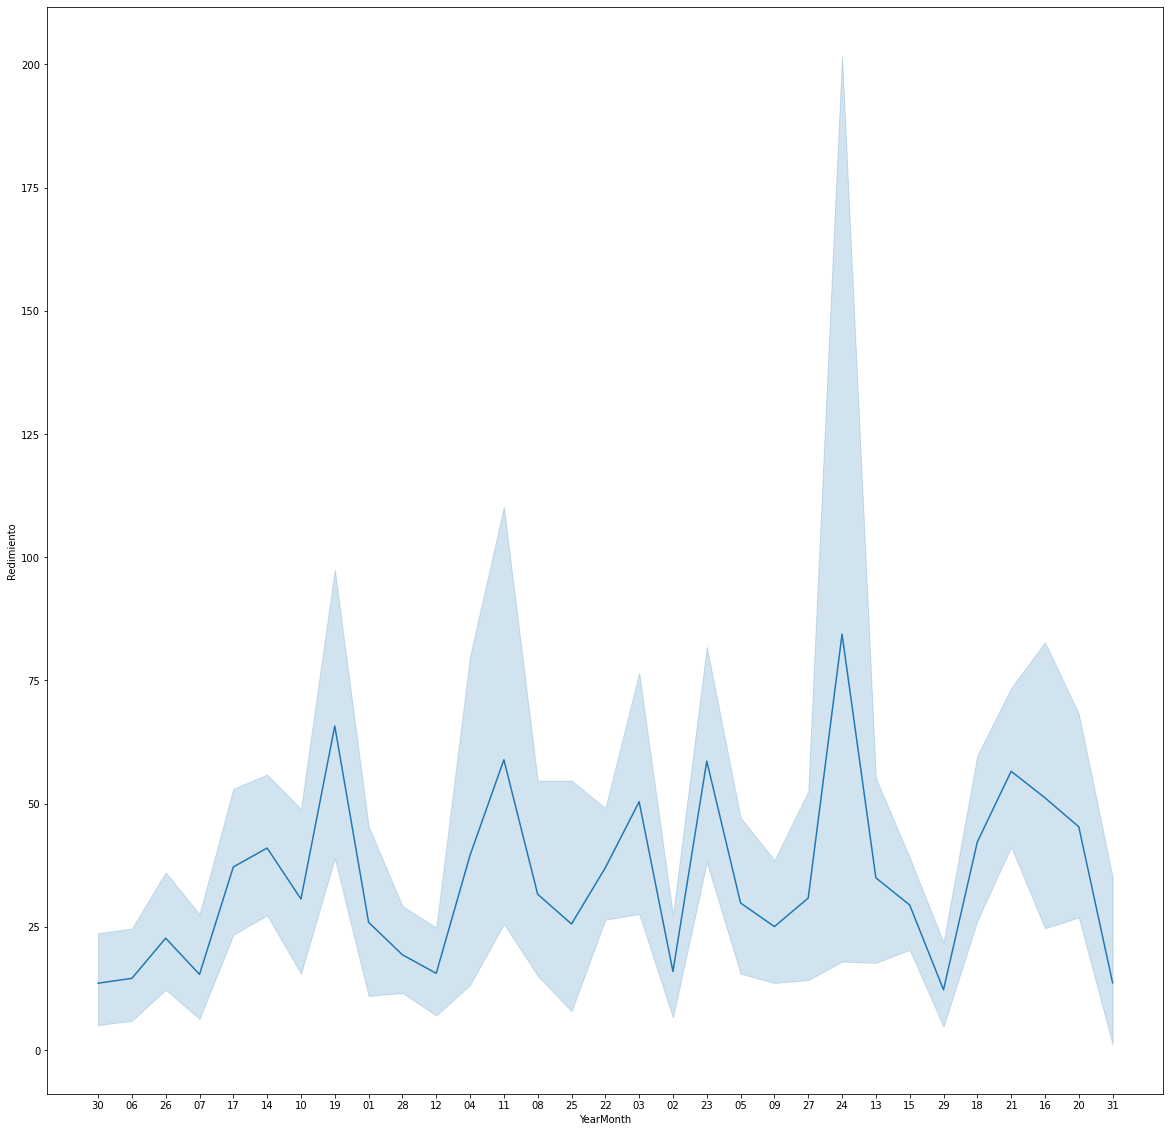

In [68]:
fig = plt.figure(figsize=(20,20))
sns.lineplot(data=df_finance,x='YearMonth',y='Redimiento')

<AxesSubplot:xlabel='Year', ylabel='amount_dolars'>

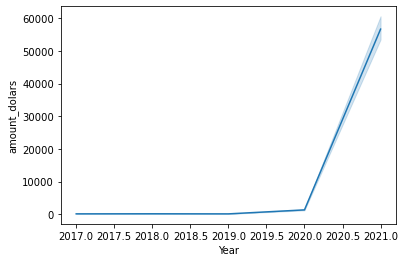

In [69]:
sns.lineplot(data=df_finance,x='Year',y='amount_dolars')

In [70]:
df_finance = df_finance.drop(['amount_dolars'], axis=1) 

In [71]:
df_finance = df_finance.drop(['trs_type'], axis=1) 

In [72]:
df_finance = df_finance.drop(['transaccion_date'], axis=1)

In [73]:
df_finance.describe()

,id,rarity,amount_eth,adj_close,Num_venta,Redimiento,Year,Month
count,12480.000000,12480.000000,12480.000000,12480.000000,12480.000000,12480.000000,12480.000000,12480.000000
mean,5375.764343,0.102114,14.786095,1199.910606,1.086859,36.608208,2019.971635,5.018349
std,2661.920676,0.045818,59.221373,974.498989,1.394178,305.302862,1.344438,3.116675
min,1.000000,0.000200,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000
25%,3126.000000,0.060217,0.600000,273.303000,0.000000,0.000000,2019.000000,2.000000
50%,5354.000000,0.104054,6.500000,1225.680000,1.000000,0.822722,2021.000000,4.000000
75%,7658.000000,0.119896,21.950000,1854.560000,2.000000,1.957943,2021.000000,7.000000
max,9998.000000,0.681778,4200.000000,4168.700000,12.000000,25195.513196,2021.000000,12.000000


In [74]:
#df_finance.to_csv('.\datasets_definitius\df_finance_all.csv')
#df_finance.to_csv('.\datasets_definitius\df_finance_top_1000.csv')

### <span style=color:darkred> 1 Análisis Types/Attibutes Heatmap </span>

In [75]:
Q1 = 'select mp.idpunks, pt.type, pt.accesories2 '
Q2 = ' from master_punks2 as mp inner join punks_accesories2 pt on mp.id = pt.id'
Q3 = ' order by idpunks asc;'
df_all_attri = pd.read_sql(Q1+Q2 +Q3, mydb)
df_all_attri

,idpunks,type,accesories2
0,0,Male,Smile
1,0,Male,Mohawk
2,1,Male,Smile
3,1,Male,Mohawk
4,2,Female,Wild Hair
...,...,...,...
27541,9998,Female,Wild White Hair
27542,9998,Female,Black Lipstick
27543,9998,Female,Clown Eyes Green
27544,9999,Female,Mohawk


In [76]:
df_dummies = pd.DataFrame()

In [77]:
df_dummies = pd.get_dummies(df_all_attri['accesories2'])

In [78]:
df_dummies

,,3D Glasses,Bandana,Beanie,Big Beard,Big Shades,Black Lipstick,Blonde Bob,Blonde Short,Blue Eye Shadow,Buck Teeth,Cap,Cap Forward,Chinstrap,Choker,Cigarette,Classic Shades,Clown Eyes Blue,Clown Eyes Green,Clown Hair Green,Clown Nose,Cowboy Hat,Crazy Hair,Dark Hair,Do-rag,...,Purple Hair,Purple Lipstick,Red Mohawk,Regular Shades,Rosy Cheeks,Shadow Beard,Shaved Head,Silver Chain,Small Shades,Smile,Spots,Straight Hair,Straight Hair Blonde,Straight Hair Dark,Stringy Hair,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27541,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
27542,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27543,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27544,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
df_all_attri=pd.concat([df_all_attri,df_dummies], axis=1)

In [80]:
df_all_attri

,idpunks,type,accesories2,,3D Glasses,Bandana,Beanie,Big Beard,Big Shades,Black Lipstick,Blonde Bob,Blonde Short,Blue Eye Shadow,Buck Teeth,Cap,Cap Forward,Chinstrap,Choker,Cigarette,Classic Shades,Clown Eyes Blue,Clown Eyes Green,Clown Hair Green,Clown Nose,Cowboy Hat,...,Purple Hair,Purple Lipstick,Red Mohawk,Regular Shades,Rosy Cheeks,Shadow Beard,Shaved Head,Silver Chain,Small Shades,Smile,Spots,Straight Hair,Straight Hair Blonde,Straight Hair Dark,Stringy Hair,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,0,Male,Smile,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,Male,Mohawk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,Male,Smile,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,Male,Mohawk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,Female,Wild Hair,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27541,9998,Female,Wild White Hair,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
27542,9998,Female,Black Lipstick,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27543,9998,Female,Clown Eyes Green,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27544,9999,Female,Mohawk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
df_all_type_att = pd.DataFrame(df_all_attri)

In [82]:
df_all_attri = df_all_attri.drop(['accesories2'], axis=1)
df_all_attri = df_all_attri.drop(['idpunks'], axis=1)

In [83]:
df_dummies = pd.get_dummies(df_all_attri['type'])
df_dummies

,Alien,Ape,Female,Male,Zombie
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
27541,0,0,1,0,0
27542,0,0,1,0,0
27543,0,0,1,0,0
27544,0,0,1,0,0


In [84]:
df_all_attri=pd.concat([df_all_attri,df_dummies], axis=1)

In [85]:
df_all_attri

,type,,3D Glasses,Bandana,Beanie,Big Beard,Big Shades,Black Lipstick,Blonde Bob,Blonde Short,Blue Eye Shadow,Buck Teeth,Cap,Cap Forward,Chinstrap,Choker,Cigarette,Classic Shades,Clown Eyes Blue,Clown Eyes Green,Clown Hair Green,Clown Nose,Cowboy Hat,Crazy Hair,Dark Hair,...,Shadow Beard,Shaved Head,Silver Chain,Small Shades,Smile,Spots,Straight Hair,Straight Hair Blonde,Straight Hair Dark,Stringy Hair,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair,Alien,Ape,Female,Male,Zombie
0,Male,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Male,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Male,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Male,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27541,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
27542,Female,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
27543,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
27544,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [86]:
df_all_attri.corr().round(2)

,,3D Glasses,Bandana,Beanie,Big Beard,Big Shades,Black Lipstick,Blonde Bob,Blonde Short,Blue Eye Shadow,Buck Teeth,Cap,Cap Forward,Chinstrap,Choker,Cigarette,Classic Shades,Clown Eyes Blue,Clown Eyes Green,Clown Hair Green,Clown Nose,Cowboy Hat,Crazy Hair,Dark Hair,Do-rag,...,Shadow Beard,Shaved Head,Silver Chain,Small Shades,Smile,Spots,Straight Hair,Straight Hair Blonde,Straight Hair Dark,Stringy Hair,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair,Alien,Ape,Female,Male,Zombie
,1.0,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00
3D Glasses,-0.0,1.00,-0.01,-0.00,-0.01,-0.01,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,0.01,-0.02,0.02,-0.00
Bandana,-0.0,-0.01,1.00,-0.01,-0.01,-0.02,-0.02,-0.01,-0.01,-0.01,-0.01,-0.02,-0.01,-0.01,-0.01,-0.03,-0.02,-0.02,-0.02,-0.01,-0.01,-0.01,-0.02,-0.01,-0.01,...,-0.02,-0.01,-0.01,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.02,-0.01,0.02,0.02,-0.01,0.01,0.01
Beanie,-0.0,-0.00,-0.01,1.00,-0.00,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.03,0.03,0.01
Big Beard,-0.0,-0.01,-0.01,-0.00,1.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.01,-0.01,-0.01,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.00,-0.01,-0.01,-0.01,-0.00,-0.01,-0.01,-0.01,-0.00,-0.00,-0.06,0.06,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Alien,-0.0,-0.00,0.02,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.01,0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.02,-0.00,-0.00,0.01,...,-0.00,-0.00,-0.00,0.02,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,-0.00,-0.02,-0.03,-0.00
Ape,-0.0,0.01,0.02,-0.00,-0.00,0.00,-0.01,-0.00,-0.00,-0.00,-0.00,0.03,0.02,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.00,0.02,-0.00,-0.00,0.02,...,-0.01,-0.00,-0.00,0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,0.01,0.00,-0.00,0.01,-0.00,-0.00,-0.01,-0.00,-0.00,1.00,-0.03,-0.05,-0.00
Female,0.0,-0.02,-0.01,-0.03,-0.06,-0.02,0.19,0.09,0.09,0.13,-0.04,-0.02,-0.08,-0.08,0.05,0.01,-0.02,0.08,0.06,0.01,-0.00,-0.06,0.01,0.10,-0.08,...,-0.11,-0.08,-0.02,-0.09,-0.07,0.00,0.09,0.09,0.09,-0.01,0.10,0.06,-0.05,-0.03,-0.06,0.00,0.07,0.09,-0.02,0.09,-0.02,-0.03,1.00,-0.98,-0.07
Male,-0.0,0.02,0.01,0.03,0.06,0.02,-0.19,-0.09,-0.09,-0.12,0.04,0.02,0.07,0.08,-0.05,-0.01,0.02,-0.08,-0.06,-0.01,0.00,0.05,-0.01,-0.09,0.08,...,0.11,0.08,0.02,0.09,0.07,-0.00,-0.09,-0.09,-0.09,0.01,-0.10,-0.06,0.05,0.03,0.06,-0.00,-0.07,-0.09,0.01,-0.09,-0.03,-0.05,-0.98,1.00,-0.11


In [87]:
MaxCorr = df_all_attri.corr()[(df_all_attri.corr()>=0.5)| (df_all_attri.corr()<=-0.5)]

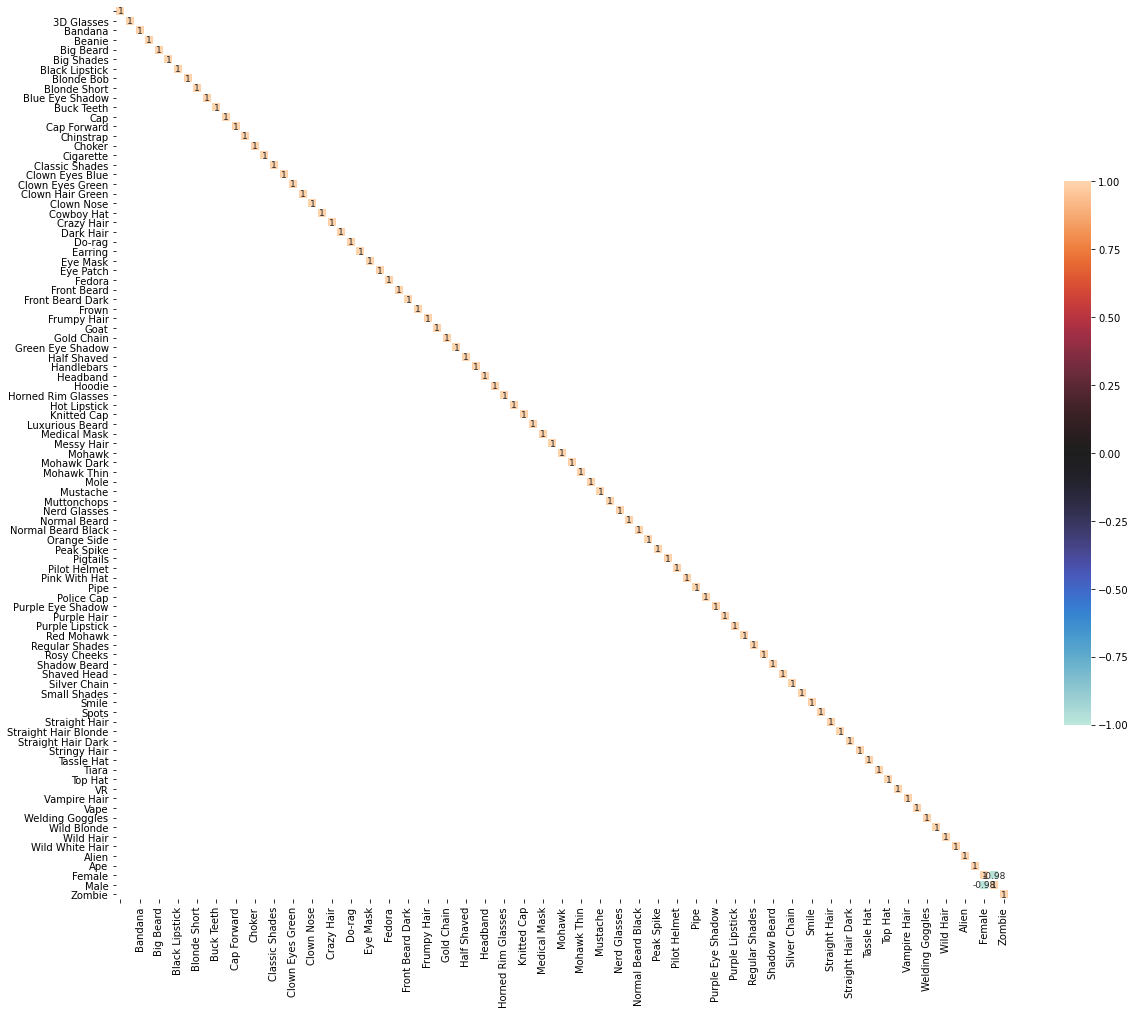

In [88]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(MaxCorr,annot=True,  annot_kws={"size":9}, square=True, linewidths=.5, cbar_kws={"shrink": .5}, robust=False, center=0, vmin=-1, vmax=1)
plt.savefig('corr2.png')
plt.show()

### <span style=color:darkred> 2 Análisis Types/Attibutes Heatmap </span>

In [89]:
Q1 = 'SELECT * FROM cryptopunks.punks_accesories2;'

In [90]:
df_T_A = pd.read_sql(Q1, mydb)

In [91]:
df_T_A

,MyUnknownColumn,id,type,count,accesories2,idaccesories
0,0,0,Female,1,Green Eye Shadow,42
1,1,0,Female,1,Earring,86
2,2,0,Female,1,Blonde Bob,20
3,3,1,Male,1,Smile,34
4,4,1,Male,1,Mohawk,67
...,...,...,...,...,...,...
27542,27542,9998,Female,1,Wild White Hair,13
27543,27543,9998,Female,1,Black Lipstick,81
27544,27544,9998,Female,1,Clown Eyes Green,61
27545,27545,9999,Female,1,Mohawk,67


In [92]:
labelencoder = LabelEncoder()

In [93]:
df_T_A['accesories2_le'] = labelencoder.fit_transform(df_T_A['accesories2'])
df_T_A['type_le'] =  labelencoder.fit_transform(df_T_A['type'])

In [94]:
df_T_A

,MyUnknownColumn,id,type,count,accesories2,idaccesories,accesories2_le,type_le
0,0,0,Female,1,Green Eye Shadow,42,35,2
1,1,0,Female,1,Earring,86,25,2
2,2,0,Female,1,Blonde Bob,20,7,2
3,3,1,Male,1,Smile,34,72,3
4,4,1,Male,1,Mohawk,67,46,3
...,...,...,...,...,...,...,...,...
27542,27542,9998,Female,1,Wild White Hair,13,87,2
27543,27543,9998,Female,1,Black Lipstick,81,6,2
27544,27544,9998,Female,1,Clown Eyes Green,61,18,2
27545,27545,9999,Female,1,Mohawk,67,46,2


In [95]:
df_heatmap = pd.DataFrame(df_T_A[['accesories2_le','type_le']])

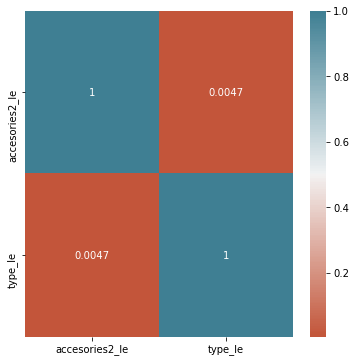

In [96]:
colormap = sns.diverging_palette(20, 220, n=200)
fig = plt.figure(figsize=(6,6))
sns.heatmap(df_heatmap.corr(),annot = True, cmap=colormap)
plt.savefig('corr.png')
plt.show()

In [97]:
df_heatmap.corr()

,accesories2_le,type_le
accesories2_le,1.000000,0.004719
type_le,0.004719,1.000000


### <span style=color:darkred> 2 Análisis Types/Attibutes pivotable</span>

In [98]:
Q1 = 'select mp.idpunks, pt.type, pt.accesories2 '
Q2 = ' from master_punks2 as mp inner join punks_accesories2 pt on mp.id = pt.id'
Q3 = ' order by idpunks asc;'
df_all_attri = pd.read_sql(Q1+Q2 +Q3, mydb)
#df_all_attri.to_csv('.\datasets_definitius\df_all_attri_all.csv')
df_all_attri

,idpunks,type,accesories2
0,0,Male,Smile
1,0,Male,Mohawk
2,1,Male,Smile
3,1,Male,Mohawk
4,2,Female,Wild Hair
...,...,...,...
27541,9998,Female,Wild White Hair
27542,9998,Female,Black Lipstick
27543,9998,Female,Clown Eyes Green
27544,9999,Female,Mohawk


In [99]:
Q1 = 'select mp.id2, pt.type, pt.accesories2'  
Q2 = ' from top1000 as mp' 
Q3 = ' inner join punks_accesories2 pt on mp.id = pt.id' 
Q4 = ' order by id2 asc;'
df_all_attri_top1000 = pd.read_sql(Q1+Q2 +Q3+Q4, mydb)
#df_all_attri_top1000.to_csv('.\datasets_definitius\df_all_attri_top1000.csv')


In [100]:
dfpivot = pd.pivot_table(df_all_attri,index=['accesories2'], columns=['type'],
                        aggfunc=np.sum,margins=True,margins_name='Total')


In [101]:
dfpivot = dfpivot.fillna(0)

In [102]:
dfpivot

idpunks                                                        
type               Alien       Ape      Female        Male     Zombie      Total
accesories2                                                                     
                     0.0       0.0     10382.0      4839.0        0.0      15221
3D Glasses           0.0    9280.0    420901.0   1098932.0    14430.0    1543543
Bandana           6457.0   18124.0    801422.0   1549186.0    28243.0    2403432
Beanie               0.0       0.0         0.0    268789.0     4513.0     273302
Big Beard            0.0       0.0         0.0    806659.0        0.0     806659
...                  ...       ...         ...         ...        ...        ...
Welding Goggles      0.0       0.0    490260.0         0.0        0.0     490260
Wild Blonde          0.0       0.0    708270.0         0.0        0.0     708270
Wild Hair            0.0       0.0    639323.0   1445580.0    28089.0    2112992
Wild White Hair      0.0       0.0    671311.0         0.0        0.0     671311
Total            89937.0  208701.0  53603781.0  87805731.0  1046200.0  142754350

[89 rows x 6 columns]

In [103]:
dfpivot.to_excel('pivot.xls')

In [104]:
dfpivot1 = pd.pivot_table(df_all_attri,index=['type'], columns=['accesories2'],
                        aggfunc=np.sum,margins=True,margins_name='Total')


In [105]:
dfpivot1 = dfpivot1.fillna(0)

In [106]:
dfpivot1

idpunks                                                                                                                                                                                                                                                                                                       ...                                                                                                                                                                                                                                                                                                                                     
accesories2          3D Glasses    Bandana    Beanie Big Beard Big Shades Black Lipstick Blonde Bob Blonde Short Blue Eye Shadow Buck Teeth        Cap Cap Forward  Chinstrap    Choker  Cigarette Classic Shades Clown Eyes Blue Clown Eyes Green Clown Hair Green Clown Nose Cowboy Hat Crazy Hair Dark Hair     Do-rag  ... Purple Lipstick Red Mohawk Regular Shades Rosy Cheeks Shadow Beard Shaved Head Silver Chain Small Shades      Smile     Spots Straight Hair Straight Hair Blonde Straight Hair Dark Stringy Hair Tassle Hat     Tiara   Top Hat         VR Vampire Hair       Vape Welding Goggles Wild Blonde  Wild Hair Wild White Hair      Total
type                                                                                                                                                                                                                                                                                                                       ...                                                                                                                                                                                                                                                                                                                                     
Alien            0.0        0.0     6457.0       0.0       0.0        0.0            0.0        0.0          0.0             0.0        0.0     2890.0      7804.0        0.0       0.0        0.0            0.0             0.0              0.0              0.0        0.0     3443.0        0.0       0.0     5905.0  ...             0.0        0.0          635.0         0.0          0.0         0.0          0.0      13709.0        0.0       0.0           0.0                  0.0                0.0          0.0        0.0       0.0       0.0        0.0          0.0        0.0             0.0         0.0        0.0             0.0      89937
Ape              0.0     9280.0    18124.0       0.0       0.0     9265.0            0.0        0.0          0.0             0.0        0.0    16572.0      3083.0        0.0       0.0     6145.0            0.0             0.0              0.0              0.0        0.0    14857.0        0.0       0.0    13956.0  ...             0.0        0.0         8498.0         0.0          0.0         0.0          0.0       4526.0        0.0       0.0           0.0                  0.0                0.0          0.0        0.0       0.0    8498.0     2460.0          0.0     4464.0             0.0         0.0        0.0             0.0     208701
Female       10382.0   420901.0   801422.0       0.0       0.0   848543.0      3173010.0   689522.0     649520.0       1497819.0        0.0   497274.0         0.0        0.0  227006.0  2140816.0       810341.0       1357372.0        1262024.0         347462.0   468346.0        0.0   871249.0  771593.0        0.0  ...       3213883.0   739761.0       560440.0    328020.0          0.0         0.0     246295.0          0.0        0.0  258383.0      767416.0             647635.0           723404.0     795289.0   850209.0  314077.0       0.0   468752.0          0.0   610950.0        490260.0    708270.0   639323.0        671311.0   53603781
Male          4839.0  1098932.0  1549186.0  268789.0  806659.0  2033422.0            0.0        0.0          0.0             0.0   449996.0  1202434.

In [107]:
dfpivot1.to_excel('pivot1.xls')

### <span style=color:darkred> DataSetGeneral</span>

In [108]:
df_finance

,id,type,rarity,amount_eth,adj_close,Num_venta,Redimiento,Year,Month,YearMonth
0,1,Male,0.094547,60.00,614.8430,2,7.171077,2020,11,30
1,1,Male,0.094547,31.00,165.9470,1,44.917140,2019,4,06
2,1,Male,0.094547,0.42,272.6920,0,0.000000,2017,6,26
3,14,Female,0.021557,2.50,93.2946,2,0.651818,2018,12,07
4,14,Female,0.021557,1.85,193.4240,1,1.991263,2017,7,17
...,...,...,...,...,...,...,...,...,...,...
12475,9989,Female,0.021576,0.30,472.9020,0,0.000000,2017,11,28
12476,9990,Male,0.173996,24.50,1812.6300,0,0.000000,2021,3,20
12477,9997,Zombie,0.008606,99.99,1746.6200,0,0.000000,2021,2,08
12478,9998,Female,0.054166,38.00,1575.8500,1,5.848119,2021,3,03


In [109]:
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12480 entries, 0 to 12479
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          12480 non-null  int64  
 1   type        12480 non-null  object 
 2   rarity      12480 non-null  float64
 3   amount_eth  12480 non-null  float64
 4   adj_close   12480 non-null  float64
 5   Num_venta   12480 non-null  int64  
 6   Redimiento  12480 non-null  float64
 7   Year        12480 non-null  int64  
 8   Month       12480 non-null  int64  
 9   YearMonth   12480 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 975.1+ KB


In [110]:
df_all_type_att

,idpunks,type,accesories2,,3D Glasses,Bandana,Beanie,Big Beard,Big Shades,Black Lipstick,Blonde Bob,Blonde Short,Blue Eye Shadow,Buck Teeth,Cap,Cap Forward,Chinstrap,Choker,Cigarette,Classic Shades,Clown Eyes Blue,Clown Eyes Green,Clown Hair Green,Clown Nose,Cowboy Hat,...,Purple Hair,Purple Lipstick,Red Mohawk,Regular Shades,Rosy Cheeks,Shadow Beard,Shaved Head,Silver Chain,Small Shades,Smile,Spots,Straight Hair,Straight Hair Blonde,Straight Hair Dark,Stringy Hair,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,0,Male,Smile,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,Male,Mohawk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,Male,Smile,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,Male,Mohawk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,Female,Wild Hair,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27541,9998,Female,Wild White Hair,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
27542,9998,Female,Black Lipstick,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27543,9998,Female,Clown Eyes Green,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27544,9999,Female,Mohawk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
#df_all_type_att = df_all_type_att.drop(['accesories2'],axis=1)

In [112]:
df_all_type_att

,idpunks,type,accesories2,,3D Glasses,Bandana,Beanie,Big Beard,Big Shades,Black Lipstick,Blonde Bob,Blonde Short,Blue Eye Shadow,Buck Teeth,Cap,Cap Forward,Chinstrap,Choker,Cigarette,Classic Shades,Clown Eyes Blue,Clown Eyes Green,Clown Hair Green,Clown Nose,Cowboy Hat,...,Purple Hair,Purple Lipstick,Red Mohawk,Regular Shades,Rosy Cheeks,Shadow Beard,Shaved Head,Silver Chain,Small Shades,Smile,Spots,Straight Hair,Straight Hair Blonde,Straight Hair Dark,Stringy Hair,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,0,Male,Smile,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,Male,Mohawk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,Male,Smile,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,Male,Mohawk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,Female,Wild Hair,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27541,9998,Female,Wild White Hair,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
27542,9998,Female,Black Lipstick,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27543,9998,Female,Clown Eyes Green,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27544,9999,Female,Mohawk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [113]:
#df_all_all = pd.DataFrame(pd.merge(df_finance,df_all_type_att,left_on='id2',right_on='idpunks'))#1000
df_all_all = pd.DataFrame(pd.merge(df_finance,df_all_type_att,left_on='id',right_on='idpunks'))

In [114]:
df_all_all.describe()

,id,rarity,amount_eth,adj_close,Num_venta,Redimiento,Year,Month,idpunks,,3D Glasses,Bandana,Beanie,Big Beard,Big Shades,Black Lipstick,Blonde Bob,Blonde Short,Blue Eye Shadow,Buck Teeth,Cap,Cap Forward,Chinstrap,Choker,Cigarette,...,Purple Hair,Purple Lipstick,Red Mohawk,Regular Shades,Rosy Cheeks,Shadow Beard,Shaved Head,Silver Chain,Small Shades,Smile,Spots,Straight Hair,Straight Hair Blonde,Straight Hair Dark,Stringy Hair,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
count,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,...,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000
mean,5506.306785,0.100973,14.611954,1197.354675,1.083718,36.115634,2019.979831,5.019165,5506.306785,0.000316,0.007431,0.020600,0.002381,0.004820,0.020055,0.020571,0.003299,0.003070,0.008923,0.002066,0.011505,0.009841,0.013255,0.001635,0.033883,...,0.005910,0.019567,0.003902,0.019050,0.004590,0.020944,0.013456,0.007087,0.015722,0.007890,0.004791,0.004992,0.004648,0.005422,0.019825,0.004619,0.001521,0.003414,0.011390,0.008062,0.008119,0.002037,0.002668,0.015608,0.003472
std,2652.762722,0.043717,51.477596,974.235314,1.388433,306.463095,1.329693,3.125331,2652.762722,0.017762,0.085882,0.142042,0.048741,0.069259,0.140189,0.141945,0.057346,0.055322,0.094039,0.045404,0.106643,0.098713,0.114366,0.040407,0.180931,...,0.076651,0.138508,0.062344,0.136704,0.067598,0.143199,0.115217,0.083884,0.124401,0.088475,0.069054,0.070479,0.068017,0.073439,0.139401,0.067808,0.038966,0.058332,0.106116,0.089427,0.089742,0.045088,0.051586,0.123953,0.058818
min,1.000000,0.000200,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3258.000000,0.061466,0.600000,272.692000,0.000000,0.000000,2019.000000,2.000000,3258.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5565.000000,0.103943,6.480000,1224.200000,1.000000,0.826673,2021.000000,4.000000,5565.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7819.000000,0.119104,21.990000,1848.460000,2.000000,1.975408,2021.000000,7.000000,7819.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [115]:
#df_all_all.to_csv('df_all_all.csv')

In [117]:
#df_all_all.to_csv('.\datasets_definitius\df_finance_attributs_all.csv')
#df_all_all.to_csv('.\datasets_definitius\df_finance_attributs_top_1000.csv')